In [4]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
from tqdm import tqdm
folder = Path.cwd().parent
import matplotlib.pyplot as plt
# pd.set_option("display.precision", 2)

number = '003'

In [5]:
combined = True

main_path = folder / '_storage' / 'main' / number

file= open(main_path / "info.txt","r") 
print(file.read())
file.close()  

if combined == True:
    print('1')
    
    com_network = pd.read_csv(main_path / 'combined_network.csv').drop('Unnamed: 0',axis=1)

#     pickle_in = open(main_path / 'combined_network.pickle'  , 'rb' )
#     com_network = pickle.load(pickle_in)
#     pickle_in.close()

    print('2')
    
    com_vessels = pd.read_csv(main_path / 'combined_vessels.csv').drop('Unnamed: 1',axis=1).rename(columns={'Unnamed: 0':'step'})

#     pickle_in2 = open(main_path / 'combined_vessels.pickle' , 'rb' )
#     com_vessels = pickle.load(pickle_in2)
#     pickle_in2.close()

    print('3')  
else:
    print('1')
    
#     network = pd.read_csv(main_path / 'network.csv')

    pickle_in = open(main_path / 'network.pickle'  , 'rb' )
    network = pickle.load(pickle_in)
    pickle_in.close()

    print('2')

    pickle_in2 = open(main_path / 'changes.pickle' , 'rb' )
    RK4 = pickle.load(pickle_in2)
    pickle_in2.close()

    print('3')

    pickle_in3 = open(main_path / 'vessels.pickle' , 'rb' )
    vessels_alltime = pickle.load(pickle_in3)
    pickle_in3.close()

    print('4')

pickle_in3 = open(main_path / 'ks.pickle' , 'rb' )
ks = pickle.load(pickle_in3)
pickle_in3.close()
    
    
v = com_vessels
n = com_network

Time of simulation: 80 seconds
Number of iterations: 1001
therefore time step is: 0.08 seconds
Delay for pressure drop: 2 seconds
Time over which pressure drops: 2 seconds
Ratio pressure drop: 0.5
kp_constant: 0.0033333333333333335
kn_constant: 0.0016666666666666668
Date and time: 2020-04-07 12:00:30.789666
save_changes: True

1
2
3


In [6]:
def time_step_display(com_network,com_vessels,i):
    if i != 0:
        display(com_network.iloc[[i-1,i,i+1],:])
    else:
        display(com_network.iloc[[i,i+1],:])

    display(com_vessels[com_vessels['step'] == i])

In [7]:
# time_step_display(com_network,com_vessels,2)
print(n.columns)

Index(['t', 'pressure_difference', 'phi', 'phi_min', 'R_tot', 'Q_tot',
       'Q_norm', 'pt_averaged', 'kp_p', 'kp_n', 'Ap', 'Dp', 'kn_p', 'kn_n',
       'An', 'Dn', 'c', 'pt_volume_averaged', 'dphidt', 'dApdt', 'dDpdt',
       'dAndt', 'dDndt', 'dcdt'],
      dtype='object')


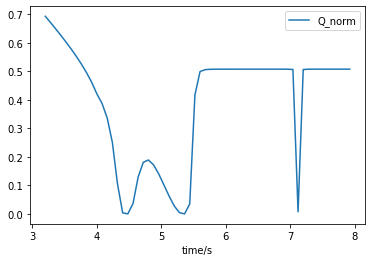

In [44]:
def norm_ave(column):
    norm = column/(column.mean())
    return norm
def p(column_name):
    plt.plot(n['t'],n[column_name],label=column_name)
def p_partial(column_name,a,b):
    plt.plot(n['t'][a:b],n[column_name][a:b],label=column_name)
def p_ave(column_name):
    plt.plot(n['t'],norm_ave(n[column_name]),label=column_name)


p_partial('Q_norm',40,100)
# p_ave('dphidt')

plt.xlabel('time/s')
plt.legend()

In [29]:
n.tail( )

,t,pressure_difference,phi,phi_min,R_tot,Q_tot,Q_norm,pt_averaged,kp_p,kp_n,...,An,Dn,c,pt_volume_averaged,dphidt,dApdt,dDpdt,dAndt,dDndt,dcdt
996,79.68,17.09,2.460197e+29,0.721083,0.000009,1.884963e+06,0.507583,6.494201e+07,1.513262e-07,0.003333,...,1.0,0.0,0.909091,6.494201e+07,NaN,NaN,NaN,NaN,NaN,NaN
997,79.76,17.09,1.685606e+29,0.721083,0.000009,1.884963e+06,0.507583,6.494201e+07,1.513262e-07,0.003333,...,1.0,0.0,0.909091,6.494201e+07,NaN,NaN,NaN,NaN,NaN,NaN
998,79.84,17.09,7.297312e+28,0.721083,0.000009,1.884963e+06,0.507583,6.494201e+07,1.513262e-07,0.003333,...,1.0,0.0,0.909091,6.494201e+07,NaN,NaN,NaN,NaN,NaN,NaN
999,79.92,17.09,-4.022996e+28,0.721083,0.000009,1.884963e+06,0.507583,6.494201e+07,1.513262e-07,0.003333,...,1.0,0.0,0.909091,6.494201e+07,NaN,NaN,NaN,NaN,NaN,NaN
1000,80.00,17.09,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
k1s_phi = {}
k2s = {}
k3s = {}
k4s = {}
for i in range(len(ks)):
    k1s_phi[i] = ks[i][0][4]
k1s_phi = pd.Series(k1s_phi)

In [47]:
k1s_phi[35:80]

35   -0.010089
36   -0.012250
37   -0.014638
38   -0.017247
39   -0.020014
40   -0.022869
41   -0.025745
42   -0.028581
43   -0.031327
44   -0.033944
45   -0.036418
46   -0.038769
47   -0.041073
48   -0.043505
49   -0.046424
50   -0.050585
51   -0.052345
52   -0.059056
53   -0.078274
54   -0.125890
55   -0.160022
56   -0.147517
57   -0.114838
58   -0.056068
59   -0.017210
60    0.004413
61    0.016929
62    0.024714
63    0.030299
64    0.036630
65    0.049481
66    0.081353
67    0.144026
68    0.228426
69    0.432919
70    0.492035
71    0.508733
72    0.511289
73    0.506407
74    0.497166
75    0.485096
76    0.470513
77    0.451838
78    0.423605
79    0.374715
dtype: float64